# Simulating the Discrete Fractional Gaussian Field
### Connor Marrs & Trent Rabe: UCONN REU 2022

This notebook simulates the DFGF on the circle:

$$
    X_s^n(\theta) \triangleq \sum_{r=1}^n\frac{1}{\lambda_r^{s}}f_r(\theta)Z_n
$$

where $\{Z_r\}$ is a collection of i.i.d $\mathcal{N}(0,1)$ standard normals,

$$
    \lambda_r = \frac{n^2}{4\pi^2}\left(e^{\frac{2\pi i r}{n}}+e^{-\frac{2\pi i r}{n}}-2\right)
    =\frac{n^2}{2\pi^2}\left(\cos\left(\frac{2\pi r}{n}\right)-1\right), \quad
    f_r(\theta) = e^{\frac{2\pi irk}{n}} 
$$

and $k$ is the unique integer such that

$$
    \frac{2\pi k}{n} \leq \theta \leq \frac{2\pi (k+1)}{n}
$$

We derive this formula by looking at the spectral decomposition of $\Delta_n$.

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
# compute k
def findk(theta,n):
    return np.floor(
        n*theta/(2*np.pi)
    )

# computes the rth eigenvalue
def eigenvals(r,n):
    # use simplified formula to compute the eigenvalue
    return np.power(n,2)/(2*(np.power(np.pi,2))) * (1-np.cos(360.0*r/n))

# computes the value of the rth eigenfunction at theta
def eigenfcn2(theta,n,r):
    if r < np.ceil(n/2.0):
        return (np.sqrt(2)/2.0)*np.cos(2*np.pi*r*findk(theta,n)/n)
    else:  
        return (np.sqrt(2)/2.0)*np.sin(2*np.pi*r*findk(theta,n)/n)
    
# computes the value of the rth eigenfunction at theta
def eigenfcn(k,n,r):
    if r < np.ceil(n/2.0):
        return (np.sqrt(2)/2.0)*np.cos(2*np.pi*r*k/n)
    else:  
        return (np.sqrt(2)/2.0)*np.sin(2*np.pi*r*k/n)

def dfgf(s,n,theta,randvec):
    sum = 0
    for r in range(1,n):
        sum += np.power(eigenvals(r,n),-1*s)*eigenfcn(theta,n,r)*randvec[r]
    return sum

In [100]:
vec = np.array([
    0, 3.4, .69, .72, .85, .43, -.43, -1.2, -1.16, 0.8
])

eigenfcn_3_10 = np.array([
    0.70711, -0.21851, -.57206, .57206, .21851, -.70711, .21851, .57206, -.57206, -.21851
])

# for k in range(10):
#     print(dfgf2(.25, 10,k,vec))

n,r=10,3

# test eigenfunctions
for k in range(0,n):
    print(dfgf(0.25,n,2*np.pi*k/n,vec))
#     if abs(dfgf(0.25,n,2*np.pi*k/n,vec)-dfgf2(0.25,n,2*np.pi*k/n,vec)) < 0.001:
#         print("dfgf & dfgf2 agree")
#     else:
#         print(f'false: error {abs(dfgf(0.25,n,2*np.pi*k/n,vec)-dfgf2(0.25,n,2*np.pi*k/n,vec))}')
    print( eigenfcn(k,n,r) )
    if abs(eigenfcn_3_10[k]-eigenfcn(k,n,r)) < 0.001:
        print("eigenfcn agrees")
    else:
        print(f'false: error {abs(eigenfcn_3_10[k]-eigenfcn(k,n,r))}, coeff {eigenfcn_3_10[k]/eigenfcn(k,n,r)}')
    if abs(k-findk(2*np.pi*k/n,n)) < 0.001:
        print("floors agree")
    else:
        print(f'false: error {abs(k-findk(2*np.pi*k/n,n))}')
    if abs(eigenfcn_3_10[k]-eigenfcn2(k,n,r)) < 0.001:
        print("eigenfcn2 agrees")
    else:
        print(f'false: error {abs(eigenfcn_3_10[k]-eigenfcn2(k,n,r))}, coeff {eigenfcn_3_10[k]/eigenfcn2(k,n,r)}')
    print("#######################")

2.8799852989589914
0.7071067811865476
eigenfcn agrees
floors agree
eigenfcn2 agrees
#######################
1.3863285234291625
-0.2185080122244105
eigenfcn agrees
floors agree
eigenfcn2 agrees
#######################
0.9788768574393358
-0.5720614028176844
eigenfcn agrees
floors agree
false: error 1.1441214028176843, coeff -0.9999975477847705
#######################
-1.157243315794025
0.5720614028176843
eigenfcn agrees
floors agree
false: error 0.35355198777558927, coeff 2.618027568767073
#######################
1.681665975735932
0.21850801222441077
eigenfcn agrees
floors agree
eigenfcn2 agrees
#######################
-1.445994463637965
-0.7071067811865476
eigenfcn agrees
floors agree
false: error 1.2791714028176844, coeff -1.236073604192023
#######################
-1.041724847462965
0.21850801222441024
eigenfcn agrees
floors agree
false: error 0.437018012224411, coeff -1.0000090970375355
#######################
-1.4605744167593546
0.5720614028176845
eigenfcn agrees
floors agree
false: 

### Computing the DFGF on the circle

In [6]:
# plot the various values
theta = np.arange(-1*np.pi,np.pi,0.01) # domain
s = 2 # s value
n = 1000
# seed the random number
# np.random.seed(193847134)
randvec = np.random.default_rng().normal(0, 1, n)

vals = np.array(
    [dfgf(s,n,t,randvec) for t in theta]
)

<IPython.core.display.Javascript object>


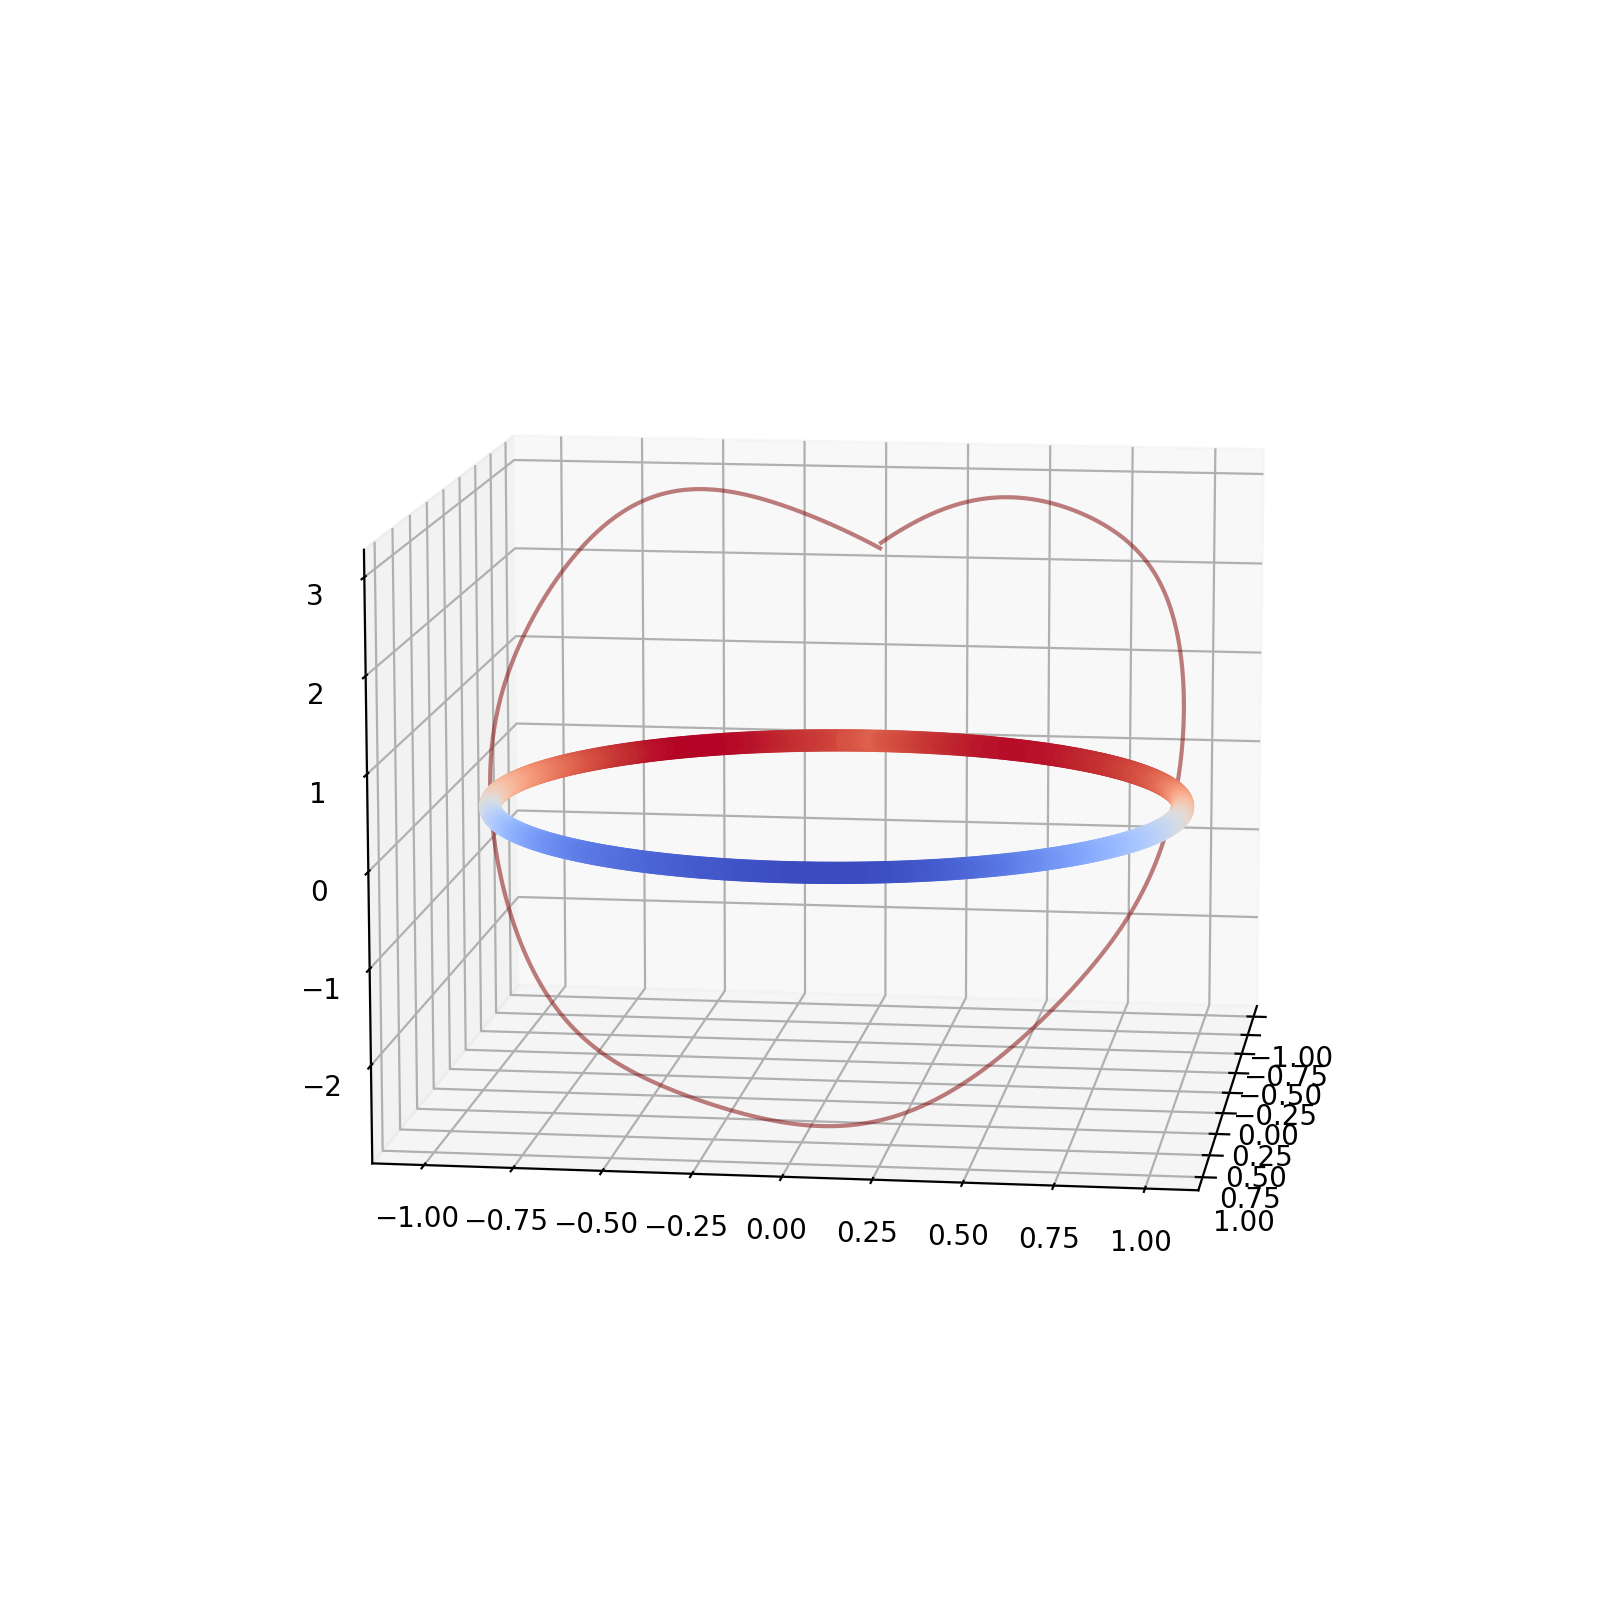

In [7]:
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.view_init(60, 35)


# Data for a three-dimensional line

ax.plot3D(np.cos(theta), np.sin(theta), vals, alpha = 0.5, c = 'maroon')
ax.scatter3D(np.cos(theta), np.sin(theta), vals*0, cmap = 'coolwarm', c = vals, alpha = 1, s = 50)
ax.plot3D(np.cos(theta), np.sin(theta), 0*theta, 'black')

plt.show()

### Computing $\mathbb{E}M_n$ experimentally

The next goal of this section is understand the growth of the maximum value as a function of $n$.
If we define
$$
    M_n \triangleq \max_{\theta\in[-\pi,\pi]}X_\frac{1}{4}^n(\theta) = 
$$
then we wish to understand
$$
    \lim_n M_n-\mathbb{E}M_n
$$
by finding a function $\phi:\mathbb{N}\rightarrow \mathbb{R}$ such that
$$
    \lim_n \frac{M_n-\mathbb{E}M_n}{\phi(n)}=C
$$
for some well studied distribution $C$.

In [10]:
# method to compute the maximum value that the discrete Gaussian takes on
def maxval(n,randvec):
    return max([dfgf(.25,n,2*np.pi*k/n, randvec) for k in range(n)])
    
# make a table of possible values of s
num_vals = 10
num_trials = 500

nvals = np.linspace(10,1000,num=num_vals,dtype="int")

avg_sample = np.zeros(num_vals)
for j in range(num_vals):

    trials=np.array([maxval(
        nvals[j], np.random.default_rng().normal(0, 1, nvals[j])
        ) for k in range(num_trials)]
    )
    avg_sample[j] = np.mean(trials)
        

KeyboardInterrupt: 

### Logarithmic Regression
In this section, we take the data generated in the previous section and
perform regression on it. It seems to fit a log curve best, and we make this
precise by considering $e^{\mathbb{E}M_n}$ and applying linear regression
to that dataset.

<IPython.core.display.Javascript object>


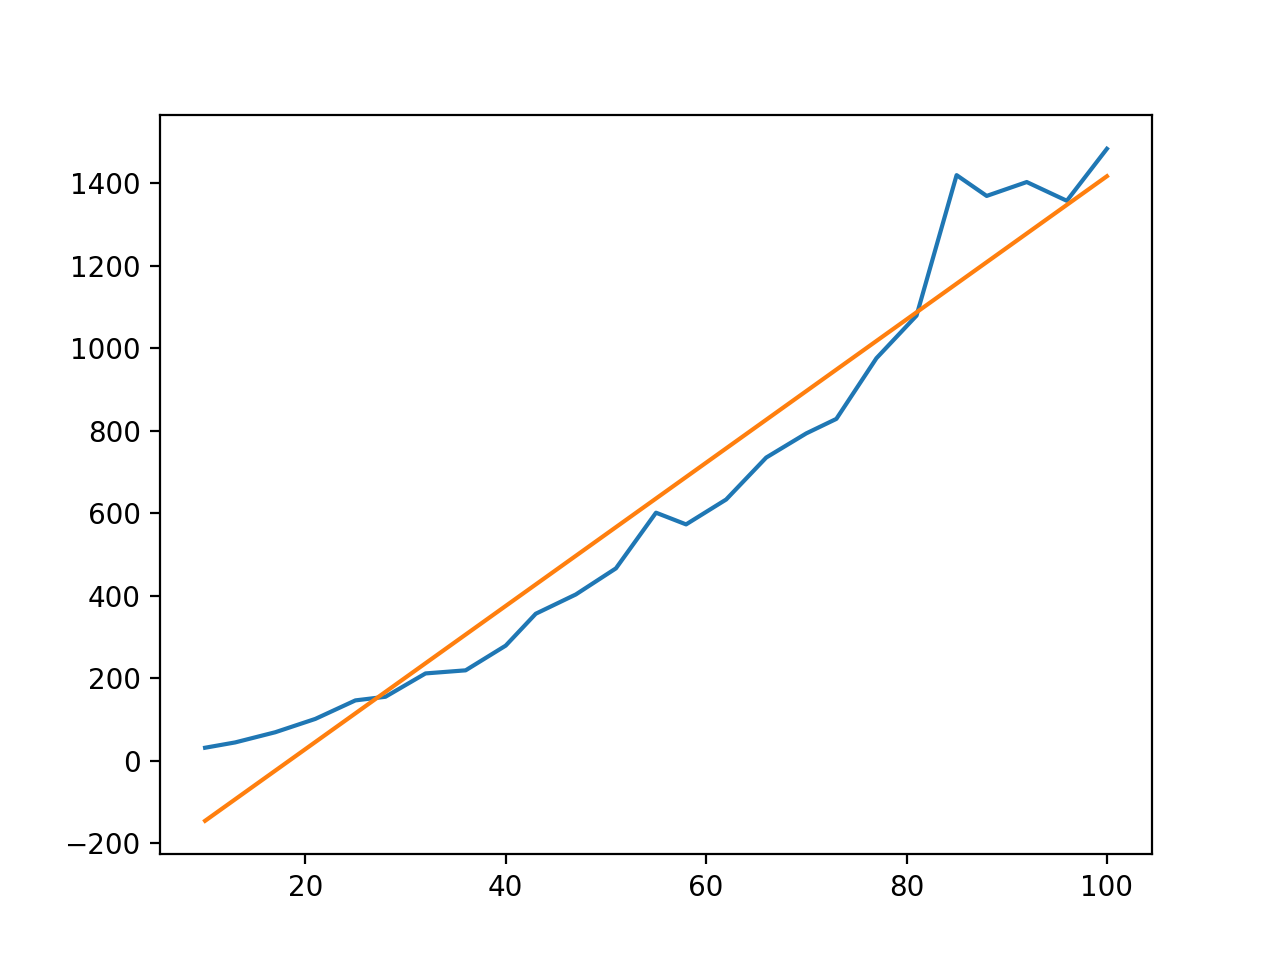

0.9509985178985426


In [42]:
%matplotlib notebook

from sklearn.linear_model import LinearRegression

nvals_trans = nvals.reshape((-1,1))

exp_scaled_vals = np.exp(avg_sample)

model = LinearRegression().fit(nvals_trans, exp_scaled_vals)
r_sq = model.score(nvals_trans, exp_scaled_vals) # figure out error
pred_vals = model.predict(nvals_trans)


plt.plot(nvals,exp_scaled_vals)
plt.plot(nvals, pred_vals)

# plt.plot(nvals,avg_sample)
# plt.plot(nvals, np.log(pred_vals))

print(r_sq)

In [ ]:
print("avg_sample")